In [1]:
# Part I 
# Fully-connected Neural Network
# Load in packages and modules
import numpy as np
# Tensorflow 2 with Keras built in - Training platform for neural networks
import tensorflow as tf
# used for plotting
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
# Load in fashion MNIST dataset
# Keras - does not do all of the computations - it is an api that sits ontop
# of Tensorflow and adds easy to use functionalities
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# Check X_train_full size
X_train_full.shape

(60000, 28, 28)

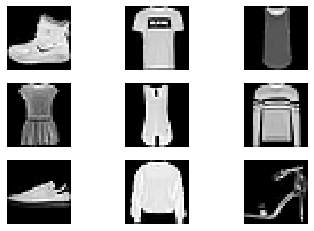

In [4]:
plt.figure()
for k in range(9):
    plt.subplot(3,3,k+1)
    plt.imshow(X_train_full[k], cmap = 'gray')
    plt.axis('off')
plt.show()

In [5]:
y_train_full[:9]

array([9, 0, 0, 3, 0, 2, 7, 2, 5], dtype=uint8)

In [6]:
# Preprocessing
# 5000 images for validation data as floats
X_valid = X_train_full[:5000] / 255.0
# 55000 images for training as floats
X_train = X_train_full[5000:] / 255.0
# 10000 test images floats
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [7]:
# Create our model
# Hyperparameters - parameters about network that you adjust before
# training procedure
from functools import partial

# Hyperparamter - regularization: help prevent overfitting - adds something
# to loss function - constant times the two norm of your weight matrices
# where the weights are relatively small - motivation:  
my_dense_layer = partial(tf.keras.layers.Dense, activation='relu',
                         kernel_regularizer=tf.keras.regularizers.l2(0.00001))

# From one layer, feeds into the next layer: feed-forward 
model = tf.keras.models.Sequential([
    # convert image into flattened list
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    # can increase layer width and depth 
    my_dense_layer(500),
    my_dense_layer(250),
    my_dense_layer(125),
    # output layer of 10 possible fashion item outputs; get ten probabilities
    my_dense_layer(10, activation='softmax')
])

In [8]:
# Options for training our model
# cross entropy loss for classification; sparse_categorical = list of int
model.compile(loss='sparse_categorical_crossentropy',
             # learning rate = determines how much you will change each of
             # weight and biases per step of the optimization
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             # how many you got right as probability
             metrics=['accuracy'])

In [9]:
# epochs = how many optimization steps you want to use
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 21s 384us/sample - loss: 0.5739 - accuracy: 0.8093 - val_loss: 0.4133 - val_accuracy: 0.8602
Epoch 2/20
55000/55000 [==============================] - 18s 321us/sample - loss: 0.4011 - accuracy: 0.8617 - val_loss: 0.3824 - val_accuracy: 0.8732
Epoch 3/20
55000/55000 [==============================] - 18s 321us/sample - loss: 0.3601 - accuracy: 0.8757 - val_loss: 0.3513 - val_accuracy: 0.8810
Epoch 4/20
55000/55000 [==============================] - 17s 312us/sample - loss: 0.3317 - accuracy: 0.8840 - val_loss: 0.3257 - val_accuracy: 0.8874
Epoch 5/20
55000/55000 [==============================] - 17s 307us/sample - loss: 0.3091 - accuracy: 0.8914 - val_loss: 0.3207 - val_accuracy: 0.8884
Epoch 6/20
55000/55000 [==============================] - 18s 320us/sample - loss: 0.2933 - accuracy: 0.8959 - val_loss: 0.3411 - val_accuracy: 0.8812
Epoch 7/20
55000/55000 [=====================

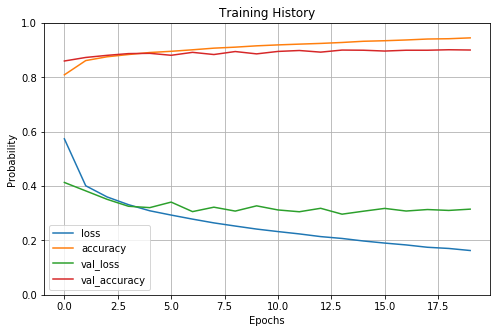

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Probability')
plt.savefig('training_history_1.png')
plt.show()
# no over-fitting when training loss goes below validation loss
# want validation loss at the bottom

In [11]:
# Make confusion matrix for training data
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)
# row represent predictions, columns represent actual labels
# Diagonals shows which values we got right 
# Useful for seeing where our algorithm went wrong - see off diagonals

[[5190    3   16   45    5    0  283    0    1    0]
 [   0 5435    0    5    1    0    3    0    0    0]
 [  59    1 4393   26  622    0  394    0    1    0]
 [  39   17    3 5203  188    0   48    0    1    0]
 [   7    4   82   42 5264    0  111    0    2    0]
 [   0    0    0    0    0 5507    0    0    0    0]
 [ 247    4   46   48  213    0 4948    0    1    0]
 [   0    0    0    0    0    6    0 5451    0   31]
 [   1    1    0    0    3    0    1    1 5503    0]
 [   0    0    0    0    0    0    0   78    0 5416]]


In [12]:
model.evaluate(X_test, y_test)
# returns loss, accuracy

10000/10000 [==============================] - 1s 102us/sample - loss: 0.3464 - accuracy: 0.8939


[0.3463535714864731, 0.8939]

In [13]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[870   2   5  13   6   1  93   0  10   0]
 [  1 981   0  10   3   0   4   0   1   0]
 [ 21   0 692  14 154   1 117   0   1   0]
 [ 20  15   7 872  51   1  31   0   3   0]
 [  2   0  32  13 902   0  49   0   2   0]
 [  0   0   0   1   0 974   0  16   0   9]
 [109   0  34  20  73   0 758   0   6   0]
 [  0   0   0   0   0  18   0 961   0  21]
 [  6   0   0   4   4   2   5   4 975   0]
 [  0   0   0   0   0  11   1  34   0 954]]


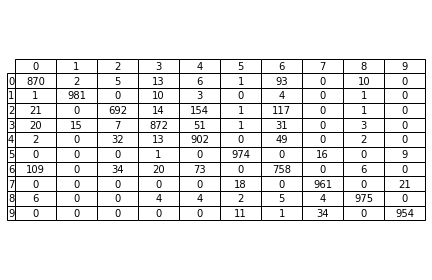

In [15]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat_1.png')

In [ ]:
# Part II Convolutional neural network - CNN

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [17]:
# Tensorflow wants 55000,28,28,1 for each convolutional layers (1 for grayscale)

X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [18]:
# Create CNN Model
# Don't have to flatten each image
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="relu", padding="same")
# zero padding = size of the feature map is the same size as the input
model = tf.keras.models.Sequential([
    # my_conv_layer(number of filters, size of filter)
    my_conv_layer(16,3,padding="same",input_shape=[28,28,1]),
    # 2 x 2 pool size with stride 2
    tf.keras.layers.MaxPooling2D(2),
    my_conv_layer(32,3),
    tf.keras.layers.MaxPooling2D(2),
    my_conv_layer(64,3),
    tf.keras.layers.Flatten(),
    my_dense_layer(64),
    my_dense_layer(10, activation="softmax")
])

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 55s 1ms/sample - loss: 0.4728 - accuracy: 0.8355 - val_loss: 0.3362 - val_accuracy: 0.8824
Epoch 2/10
55000/55000 [==============================] - 50s 911us/sample - loss: 0.3186 - accuracy: 0.8908 - val_loss: 0.3133 - val_accuracy: 0.8950
Epoch 3/10
55000/55000 [==============================] - 47s 851us/sample - loss: 0.2774 - accuracy: 0.9059 - val_loss: 0.2991 - val_accuracy: 0.9020
Epoch 4/10
55000/55000 [==============================] - 44s 794us/sample - loss: 0.2545 - accuracy: 0.9155 - val_loss: 0.2607 - val_accuracy: 0.917044 - ac - ETA: 0s - loss: 0.254
Epoch 5/10
55000/55000 [==============================] - 34s 623us/sample - loss: 0.2359 - accuracy: 0.9237 - val_loss: 0.2552 - val_accuracy: 0.9172
Epoch 6/10
55000/55000 [==============================] - 36s 652us/sample - loss: 0.2195 - accuracy: 0.9309 - val_loss: 0.2607 - val_accuracy: 0.9158
Epoch 7/10
55000

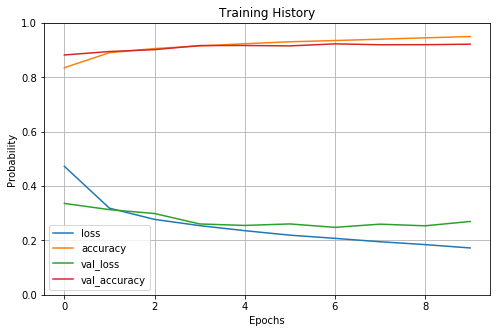

In [23]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Probability')
plt.savefig('training_history_2.png')
plt.show()

In [24]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[5360    0   49   16    5    0  109    0    4    0]
 [   0 5438    0    4    2    0    0    0    0    0]
 [  39    0 5152   11  240    0   53    0    1    0]
 [  55    7   15 5243  131    0   48    0    0    0]
 [   3    1   86   32 5349    0   40    0    1    0]
 [   0    0    0    0    0 5494    0    7    0    6]
 [ 454    2  200   26  302    0 4516    0    7    0]
 [   0    0    0    0    0   16    0 5461    4    7]
 [   1    0    0    1    0    0    1    0 5507    0]
 [   0    0    0    0    0    2    0  236    0 5256]]


In [25]:
model.evaluate(X_test,y_test) 

10000/10000 [==============================] - 1s 127us/sample - loss: 0.2949 - accuracy: 0.9161


[0.29485756080150605, 0.9161]

In [26]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[911   1  20   5   4   1  54   0   4   0]
 [  1 985   0   7   5   0   0   0   2   0]
 [ 16   1 895   5  54   0  29   0   0   0]
 [ 25   5  12 893  38   0  22   0   5   0]
 [  1   1  25  15 925   0  33   0   0   0]
 [  0   0   0   0   0 987   0   8   0   5]
 [134   1  72  16 104   0 664   0   9   0]
 [  0   0   0   0   0   7   0 986   1   6]
 [  3   1   2   1   4   2   3   1 982   1]
 [  0   0   0   0   0   4   0  62   1 933]]


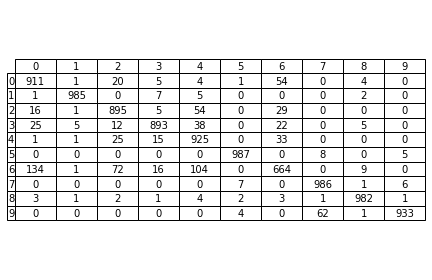

In [27]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat_2.png')